In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
dataset.shape

(14, 5)

iniciando analise exploratória

In [4]:
#explorando dados categoricos 
#aparencia

agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

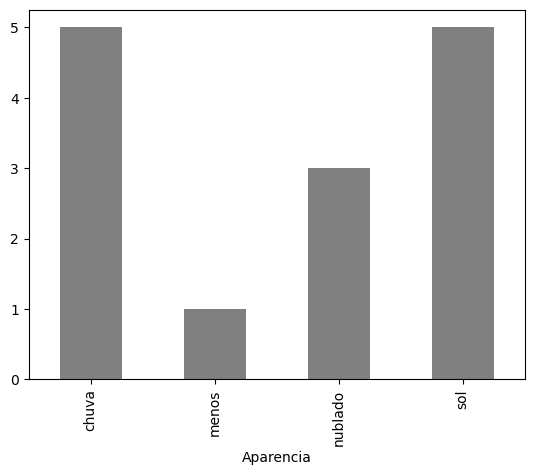

In [5]:
agrupado.plot.bar(color = 'gray')

In [6]:
#Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

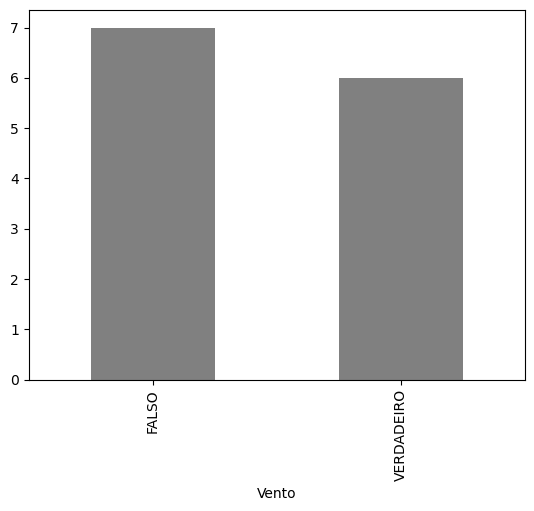

In [7]:
agrupado.plot.bar(color = 'gray')

In [8]:
#Jogar
agrupado = dataset.groupby(["Jogar"]).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

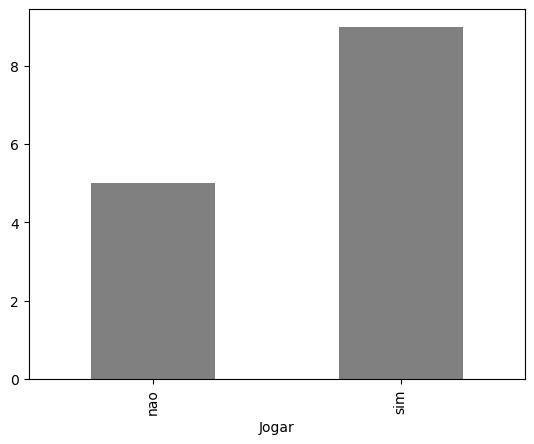

In [9]:
agrupado.plot.bar(color = 'gray')

In [10]:
#dados numéricos
#temperatura

dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

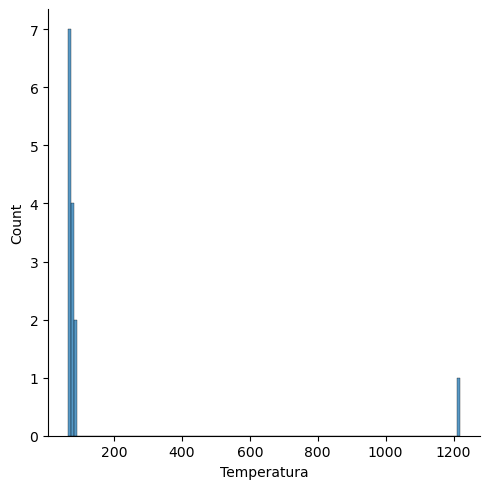

In [11]:
srn.displot(dataset['Temperatura']).set_titles('Temperatura')

Text(0.5, 1.0, 'Temperatura')

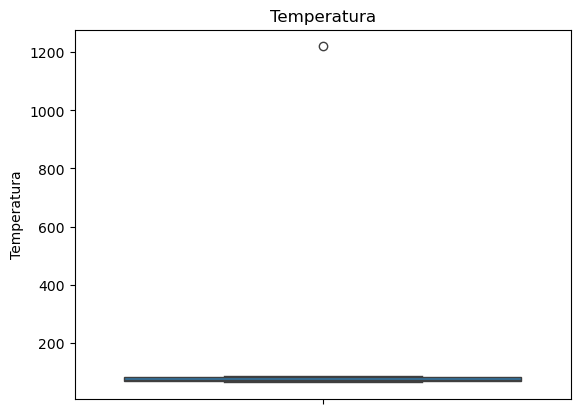

In [12]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

In [13]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

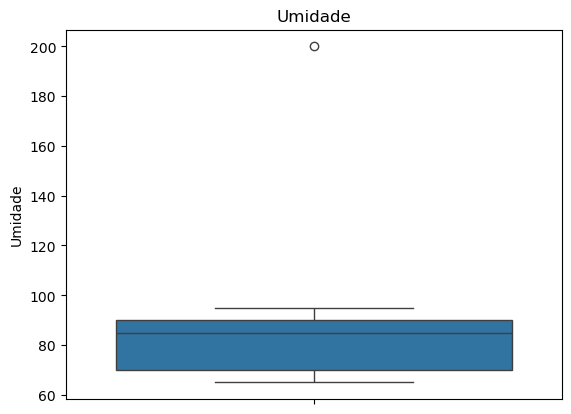

In [14]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

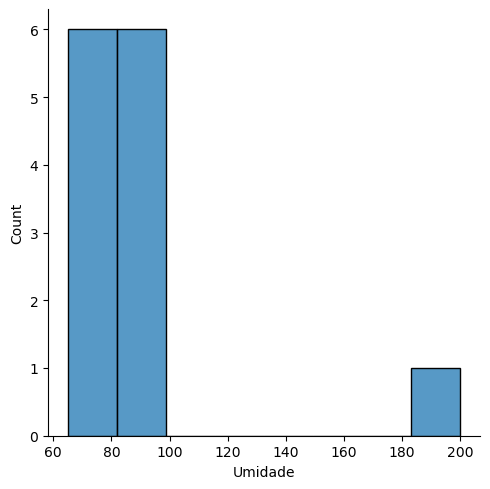

In [15]:
srn.displot(dataset['Umidade']).set_titles('Umidade')

In [16]:
#ver valores NaN

dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [17]:
#preenchendo NaNs
#umidade
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [18]:
dataset['Umidade'].fillna(mediana, inplace=True)

C:\Users\phlor\AppData\Local\Temp\ipykernel_8724\3731535888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Umidade'].fillna(mediana, inplace=True)


In [19]:
dataset['Umidade'].isnull().sum()

0

In [20]:
#preenchendo NaNs
#vento

dataset['Vento'].isnull().sum()

1

In [21]:
dataset['Vento'].fillna('FALSO', inplace=True)

C:\Users\phlor\AppData\Local\Temp\ipykernel_8724\3401709182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Vento'].fillna('FALSO', inplace=True)


In [22]:
dataset['Vento'].isnull().sum()

0

In [23]:
#modificando valores fora do padrão
#dados categoricos

#aparencia

agrupado = dataset.groupby(['Aparencia']).size()
agrupado


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [24]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [25]:
#modificando valores fora do padrão
#dados numéricos

#temperatura

dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [26]:
dataset.loc[(dataset['Temperatura'] < 0) | (dataset['Temperatura'] > 120)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [27]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [28]:
dataset.loc[(dataset['Temperatura'] < 0) | (dataset['Temperatura'] > 120), 'Temperatura'] = mediana

C:\Users\phlor\AppData\Local\Temp\ipykernel_8724\2825578493.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Temperatura'] < 0) | (dataset['Temperatura'] > 120), 'Temperatura'] = mediana


In [29]:
dataset.loc[(dataset['Temperatura'] < 0) | (dataset['Temperatura'] > 120)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [30]:
dataset['Umidade'].describe()

count     14.000000
mean      89.464286
std       33.204763
min       65.000000
25%       71.250000
50%       85.250000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [31]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [32]:
mediana = sts.median(dataset['Umidade'])
mediana

85.25

In [33]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [34]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [35]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [36]:
dataset.shape

(14, 5)

In [37]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64